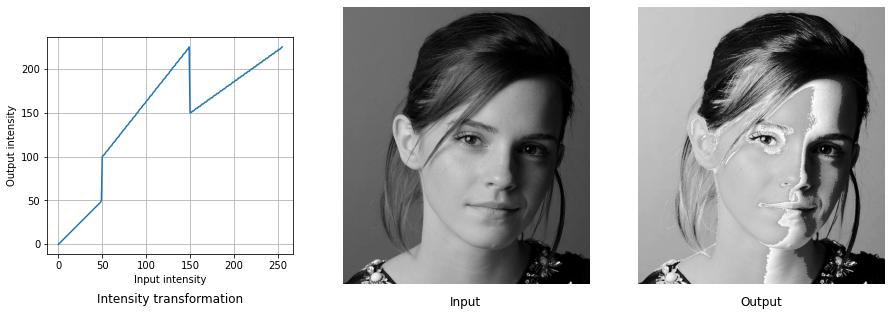

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread("emma_gray.jpg",cv.IMREAD_GRAYSCALE)
array1 = np.linspace(0,50,50)
array2 = np.linspace(100,225,100)
array3 = np.linspace(150,225,106)

array_final = np.concatenate((array1,array2,array3)).astype(np.uint8)
fig,ax = plt.subplots(1,3,figsize=(15,10))
ax[0].plot(array_final)
ax[0].set_aspect("equal")
ax[0].grid()
ax[0].set_xlabel("Input intensity")
ax[0].set_ylabel("Output intensity")
ax[0].set_title("Intensity transformation",y=-0.25)
img2 = cv.LUT(img,array_final)
ax[1].imshow(img,cmap='gray')
ax[1].axis("off")
ax[1].set_title("Input",y=-0.1)
ax[2].imshow(img2,cmap='gray')
ax[2].axis("off")
ax[2].set_title("Output",y=-0.1)
plt.show()


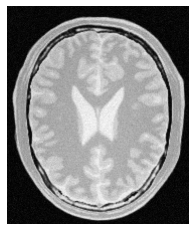

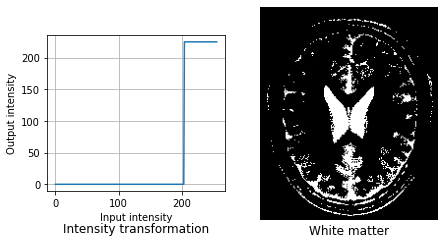

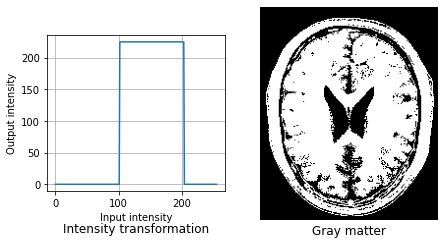

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread("brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
fig,ax=plt.subplots()
ax.imshow(img,cmap='gray')
plt.axis("off")
w_array1 = np.linspace(0,0,204)
w_array2 = np.linspace(225,225,52)
g_array1 = np.linspace(0,0,102)
g_array2 = np.linspace(225,225,102)
g_array3 = np.linspace(0,0,52)

array_w= np.concatenate((w_array1,w_array2)).astype(np.uint8)
array_g= np.concatenate((g_array1,g_array2,g_array3)).astype(np.uint8)
fig,ax = plt.subplots(1,2,figsize=(7,7))
ax[0].plot(array_w)
ax[0].set_aspect("equal")
ax[0].grid()
ax[0].set_xlabel("Input intensity")
ax[0].set_ylabel("Output intensity")
ax[0].set_title("Intensity transformation",y=-0.3)
imgW = cv.LUT(img,array_w)
ax[1].imshow(imgW,cmap='gray')
ax[1].axis("off")
ax[1].set_title("White matter",y=-0.1)
plt.show()
fig,ax = plt.subplots(1,2,figsize=(7,7))
ax[0].plot(array_g)
ax[0].set_aspect("equal")
ax[0].grid()
ax[0].set_xlabel("Input intensity")
ax[0].set_ylabel("Output intensity")
ax[0].set_title("Intensity transformation",y=-0.3)
imgG = cv.LUT(img,array_g)
ax[1].imshow(imgG,cmap='gray')
ax[1].axis("off")
ax[1].set_title("Gray matter",y=-0.1)
plt.show()

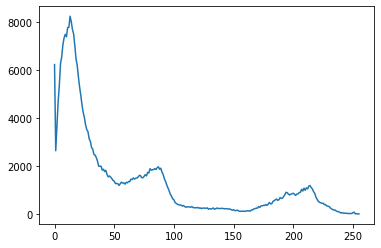

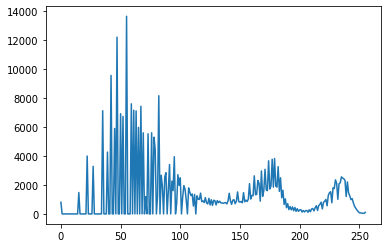

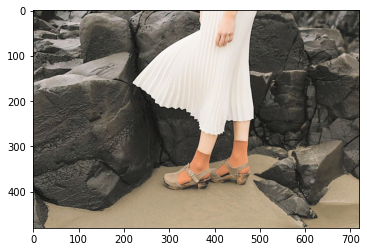

In [16]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("highlights_and_shadows.jpg",cv.IMREAD_COLOR)
img_hist = cv.calcHist([img],[0],None,[256],[0,256])
f,a = plt.subplots()
a.plot(img_hist)
plt.show()
img = cv.cvtColor(img,cv.COLOR_BGR2LAB)
L,a,b = cv.split(img)


gamma = 0.5
t_L = np.array([(p/255.0)**gamma*255 for p in L]).astype(np.uint8)


gamma = 1
t_a = np.array([p/255**gamma*255 for p in range(0,256)]).astype(np.uint8)
a_new=cv.LUT(a,t_a)

gamma = 1
t_b = np.array([p/255**gamma*255 for p in range(0,256)]).astype(np.uint8)
b_new=cv.LUT(b,t_b)

img2= cv.merge([t_L,a_new,b_new])
img_hist = cv.calcHist([img2],[0],None,[256],[0,256])
f,a = plt.subplots()
a.plot(img_hist)
plt.show()
img3=cv.cvtColor(img2,cv.COLOR_Lab2RGB)
img=cv.cvtColor(img,cv.COLOR_Lab2RGB)
fig,ax= plt.subplots()
ax.imshow(img3)

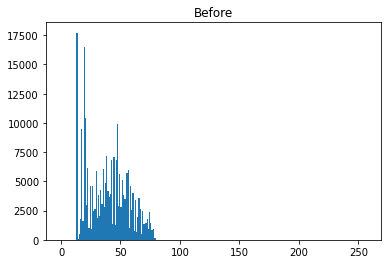

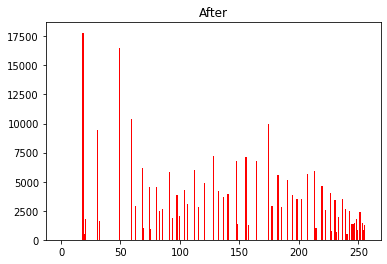

(-0.5, 999.5, 499.5, -0.5)

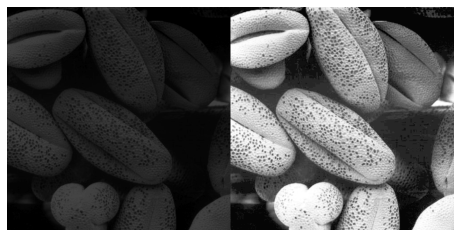

In [127]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img =cv.imread("shells.png",cv.IMREAD_GRAYSCALE)
plt.hist(img.flatten(),256,[0,256])
plt.title("Before")
plt.show()
L=256
hist,bins = np.histogram(img.ravel(),256,[0,256])
cdf=hist.cumsum()
eqcHist = np.round((L-1)*cdf/cdf.max())

img2 = cv.LUT(img,eqcHist)

plt.hist(img2.flatten(),256,[0,256],color='r')
plt.title("After")
plt.show()


fig,ax=plt.subplots(1,1,figsize=(8,8))
pkc = np.hstack((img,img2))
ax.imshow(pkc,cmap='gray')
plt.axis('off')




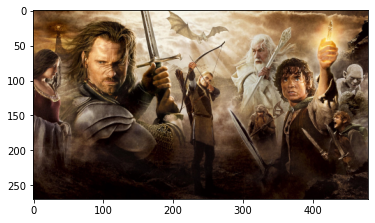

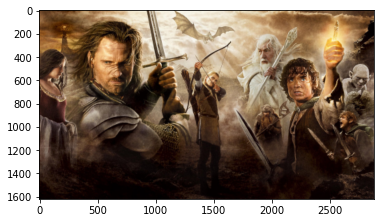

In [26]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img =cv.imread("./New folder/im01small.png",cv.IMREAD_COLOR).astype(np.uint8)
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
s=6
rows= img.shape[0]*s
colums =img.shape[1]*s
zoomed_img = np.zeros((rows,colums,3)).astype(np.uint8)
for r in range(rows):
    for c in range(colums):
        for h in range(3):
            zoomed_img[r][c][h]=img[r//s][c//s][h]

fig,ax=plt.subplots(figsize=(6,6))
ax.imshow(img)
plt.show()
fig,ax=plt.subplots(figsize=(6,6))
ax.imshow(zoomed_img)
plt.show()


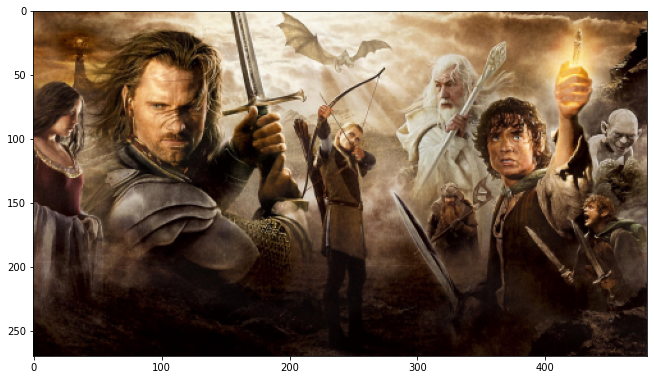

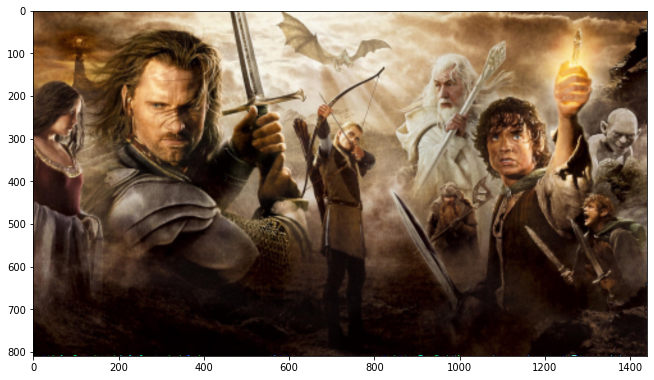

Images don't have the same shape.


In [50]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img =cv.imread("./New folder/im01small.png",cv.IMREAD_COLOR).astype(np.uint8)
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
s=3
rows= img.shape[0]*s
columns =img.shape[1]*s
zoomed_img = np.zeros((rows,columns,3)).astype(np.uint8)
for r in range(rows):
    for c in range(columns):
        for h in range(3):
            x0,y0=r/s,c/s
            x,y=min(max(round(x0-0.5),0),img.shape[0]-2),min(max(round(y0-0.5),0),img.shape[1]-2)
            x_ratio,y_ratio = x0-x,y0-y
            
            value11,value12,value21,value22 = img[x][y][h],img[x][y+1][h],img[x+1][y][h],img[x+1][y+1][h]
            new_value_1 = value11*(1-x_ratio)+ value21 *x_ratio
            new_value_2 = value12*(1-x_ratio)+ value22 *x_ratio
            zoomed_img[r][c][h] = round(new_value_1*(1-y_ratio)+ new_value_2*y_ratio)
    


fig,ax=plt.subplots(figsize=(11,11))
ax.imshow(img,cmap='gray')
plt.show()
fig,ax=plt.subplots(figsize=(11,11))
ax.imshow(zoomed_img,cmap='gray')
plt.show()


def calculate_ssd(img1, img2):
    """Computing the sum of squared differences (SSD) between two images."""
    if img1.shape != img2.shape:
        print("Images don't have the same shape.")
        return
    return np.sum((np.array(img1, dtype=np.float32) - np.array(img2, dtype=np.float32))**2)
calculate_ssd(img,zoomed_img)

2.850980392156863 -2.9411764705882355
255 0
[[1]
 [2]
 [1]]


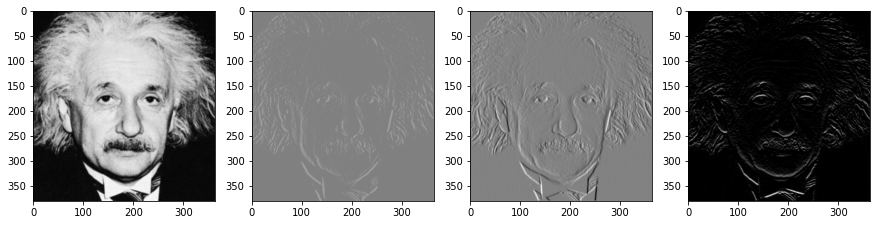

In [101]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img =cv.imread("einstein.png",cv.IMREAD_GRAYSCALE)
# sobel_v = np.array([(-1,-2,-1),(0,0,0),(1,2,1)])
# img_v= cv.filter2D(img,-1,sobel_v)

sobel_v = np.array([(-1,0,1),(-2,0,2),(-1,0,1)])
img_sobel_v = cv.filter2D(img,-1,sobel_v)




fig,ax = plt.subplots(1,4,figsize=(15,10))
ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[1].imshow(img_sobel_v,cmap='gray',vmin=-1020,vmax=1020)



def sobelFilter(img):
    
    sobel_v = np.array([(-1,0,1),(-2,0,2),(-1,0,1)])
    rows,columns=img.shape
    r_lim,c_lim = sobel_v.shape[0]//2,sobel_v.shape[1]//2
    filteredImg = np.zeros(img.shape)
    image = cv.normalize ( img.astype('float') ,None, 0.0 , 1.0 ,cv.NORM_MINMAX)
    for r in range(r_lim,rows-r_lim):
        for c in range(c_lim,columns-c_lim):
            filteredImg[r][c] = np.dot(image[r-r_lim:r+r_lim+1,c-c_lim:c+c_lim+1].flatten(),sobel_v.flatten())
    return filteredImg
x=sobelFilter(img)
print(np.max(x),np.min(x))
print(np.max(img_sobel_v),np.min(img_sobel_v))
ax[2].imshow(x,cmap='gray')


kernel1=np.array([1,2,1]).reshape(3,1)
kernel2=np.array([(1),(0),(-1)])
print(kernel1)
img_1 = cv.filter2D(img,-1,kernel1)
img_2 = cv.filter2D(img,-1,kernel2)

ax[3].imshow(img_2,cmap='gray')

plt.show()
